<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_54_word_embedding_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어 임베딩
## 텍스트 분석에서 널리 사용됨
- 자연어 처리, 문서 분류, 감성분석, 저작 식별, QA, 챗봇  

## 토큰화
- 단어, 글자, n-gram

## 인코딩
- 원-핫 인코딩: 단어집 크기의 벡터를 사용한다 (크기가 매우 크고 희소함)
- 토큰 임베딩

## 토큰 임베딩 
- 단어 임베딩
- 글자 임베딩
- n-gram 임베딩

### 원-핫 인코딩은 문장의 구조 정보를 잃어버린다

## 단어 벡터
- 희소 베터대신 밀집 벡터를 사용
- id를 구분하는 용도가 아니라 공간상의 점을 매핑 (거리와 벡터를 제공)

### 생성 방법
- 특정한 문제를 해결하는 과정에서 (모델을 만드는 과정에서) 부수적으로 단어벡터를 만들 수 있다. 단어간의 의미를 반영한다. 의미가 가까우면 거리도 가깝게. 
- 다른 곳에서 만든 단어벡터를 로드하여 사용


### Embedding 계층을 사용하여 쉽게 만들 수 있다
- 정수 인덱스를 벡터로 매핑하는 딕셔너리 구조 (인덱스 크기, 벡터 크기)
- 학습 시키는 데이터에 따라 다른 임베딩이 만들어진다.

### IMDB 영화 리뷰 데이터를 사용한 임베딩 예제



In [0]:
from keras.layers import Flatten, Dense, Embedding
from keras.models import Sequential
import os, os.path
import zipfile
from keras.datasets import imdb
from keras import preprocessing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [0]:


max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



17465344/17464789 [==============================] - 2s 0us/step


In [0]:
x_train.shape

(25000,)

In [0]:
y_train[:3]

array([1, 0, 0])

In [0]:
x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
x_train.shape

(25000, 20)

In [0]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 90us/step - loss: 0.6730 - acc: 0.6107 - val_loss: 0.6267 - val_acc: 0.6888
Epoch 2/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.5492 - acc: 0.7478 - val_loss: 0.5295 - val_acc: 0.7342
Epoch 3/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.4654 - acc: 0.7860 - val_loss: 0.5007 - val_acc: 0.7452
Epoch 4/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.4239 - acc: 0.8080 - val_loss: 0.4934 - val_acc: 0.7472
Epoch 5/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.3957 - acc: 0.8245 - val_loss: 0.4927 - val_acc: 0.7554
Epoch 6/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.3737 - acc: 0.8371 - val_loss: 0.4964 - val_acc: 0.7574
Epoch 7/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.3536 - acc: 0.8475 - val_loss: 0.4998 - val_acc:

## 위의 결과는 20개의 단어만 고려한 것임
### 성능이 75% 정도 됨
- 각 단어를 독립적으로 다루었으며, 문장의 구성 정보를 고려하지 않음
- 문장의 구조 정보를 고려하려면 임베딩 층 위에 합성곱이나 순환신경망 층을 추가한다

## 사전훈련된 임베딩 사용
- 사전 학습된 합성곱 신경망을 사용하는 것과 같이 임베딩도 사전훈련된 값을 사용할 수 있다.
### 이 예에서는 성능 개선이 없다 (오히려 50% 정도로 낮음)

## 사전 학습 임베딩
- 2013년 구글의 Word2Vect
- 2014년 스탠포드의 GloVe: 단어의 동시출현 통계를 분석 

## 원본 IMDB를 사용하여 (토큰화 되기 전의) 텍스트 처리부터 작업을 하겠다
- 훈련 데이터가 부족할 때 유용하다
- 훈련 데이터가 충분하면 직접 학습하는 것이 낫다

In [0]:
if not os.path.exists("./data"):
    os.makedirs("./data")
if not os.path.exists("./data/IMDB.zip"):
  !wget --no-check-certificate http://mng.bz/0tIo \
  -O ./data/IMDB.zip

In [0]:
!ls data

aclImdb		   glove.6B.200d.txt  glove.6B.50d.txt	glove.zip  __MACOSX
glove.6B.100d.txt  glove.6B.300d.txt  glove6B.zip	IMDB.zip


In [0]:
local_zip = './data/IMDB.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [0]:
imdb_dir='./data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 10000  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [0]:
data=pad_sequences(sequences, maxlen=maxlen)
labels=np.asarray(labels)
data.shape, labels.shape

((25000, 100), (25000,))

In [0]:
if not os.path.exists("./data"):
    os.makedirs("./data")
if not os.path.exists("./data/glove6B.zip"):
  !wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip \
  -O ./data/glove6B.zip

--2018-11-20 09:42:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-11-20 09:42:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘./data/glove6B.zip’

./data/glove6B.zip  100%[===================>] 822.24M  21.1MB/s    in 32s     

2018-11-20 09:42:55 (25.8 MB/s) - ‘./data/glove6B.zip’ saved [862182613/862182613]



In [0]:
!ls -al data

total 3098448
drwxr-xr-x 4 root root       4096 Nov 20 09:43 .
drwxr-xr-x 1 root root       4096 Nov 20 07:54 ..
drwxr-xr-x 4 root root       4096 Nov 20 07:45 aclImdb
-rw-r--r-- 1 root root  347116733 Nov 20 09:43 glove.6B.100d.txt
-rw-r--r-- 1 root root  693432828 Nov 20 09:43 glove.6B.200d.txt
-rw-r--r-- 1 root root 1037962819 Nov 20 09:43 glove.6B.300d.txt
-rw-r--r-- 1 root root  171350079 Nov 20 09:43 glove.6B.50d.txt
-rw-r--r-- 1 root root  862182613 Oct 25  2015 glove6B.zip
-rw-r--r-- 1 root root          0 Nov 20 09:33 glove.zip
-rw-r--r-- 1 root root   60711700 Nov 18  2017 IMDB.zip
drwxr-xr-x 3 root root       4096 Nov 20 07:45 __MACOSX


In [0]:
local_zip = './data/glove6B.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [0]:
glove_dir='data'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [0]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False



In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 311us/step - loss: 0.7288 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.4963
Epoch 2/10
10000/10000 [==============================] - 3s 258us/step - loss: 0.6918 - acc: 0.5161 - val_loss: 0.6990 - val_acc: 0.4927
Epoch 3/10
10000/10000 [==============================] - 3s 256us/step - loss: 0.6811 - acc: 0.5541 - val_loss: 0.7321 - val_acc: 0.4971
Epoch 4/10
10000/10000 [==============================] - 3s 251us/step - loss: 0.6516 - acc: 0.6045 - val_loss: 0.7746 - val_acc: 0.4836
Epoch 5/10
10000/10000 [==============================] - 3s 252us/step - loss: 0.5956 - acc: 0.6632 - val_loss: 0.8194 - val_acc: 0.4952
Epoch 6/10
10000/10000 [==============================] - 3s 252us/step - loss: 0.5336 - acc: 0.7188 - val_loss: 0.8367 - val_acc: 0.4931
Epoch 7/10
10000/10000 [==============================] - 3s 258us/step - loss: 0.4663 - acc: 0.7667 - val_loss: 0.9025 - 

Text(0.5,1,'Training and validation loss')

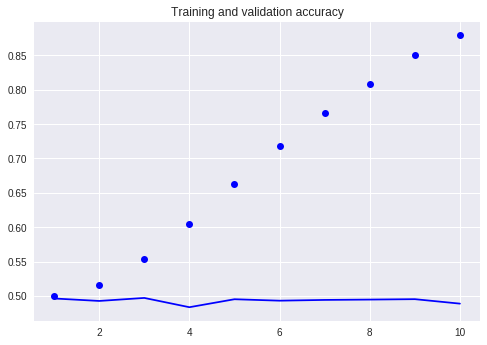

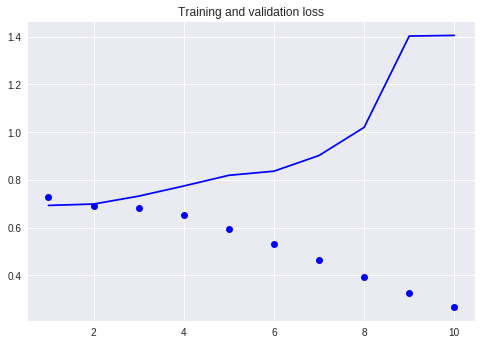

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')